In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
import missingno

In [5]:

from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## EDA



In [11]:
df.isna().sum().sort_values(ascending=False)/df.shape[0]

total_bedrooms        0.010029
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

<Axes: >

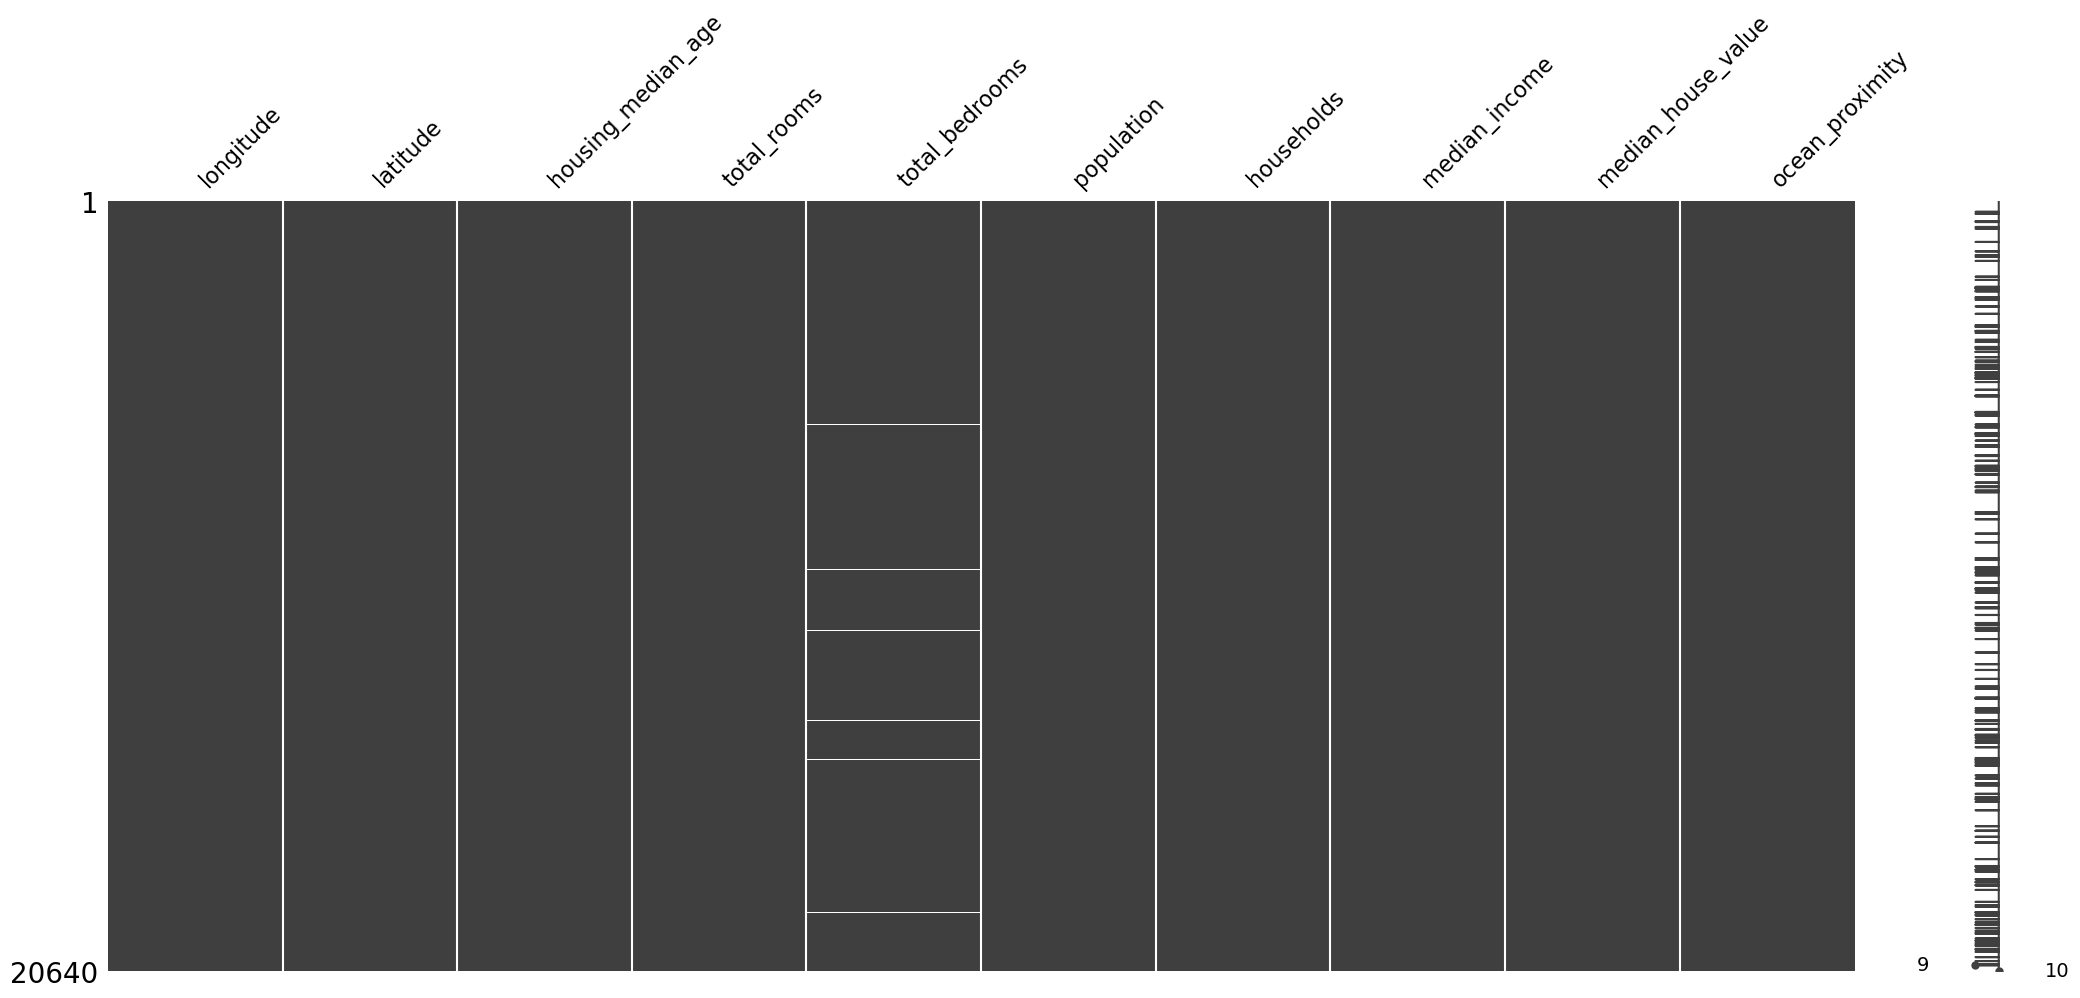

In [12]:
missingno.matrix(df)

In [14]:
df.shape[0] * 0.8

16512.0

In [15]:
df.shape[0] * 0.2

4128.0

In [16]:
# Impute missing values in 'total_bedrooms' with the median
 df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [17]:
df.isna().sum().sort_values(ascending=False)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: >

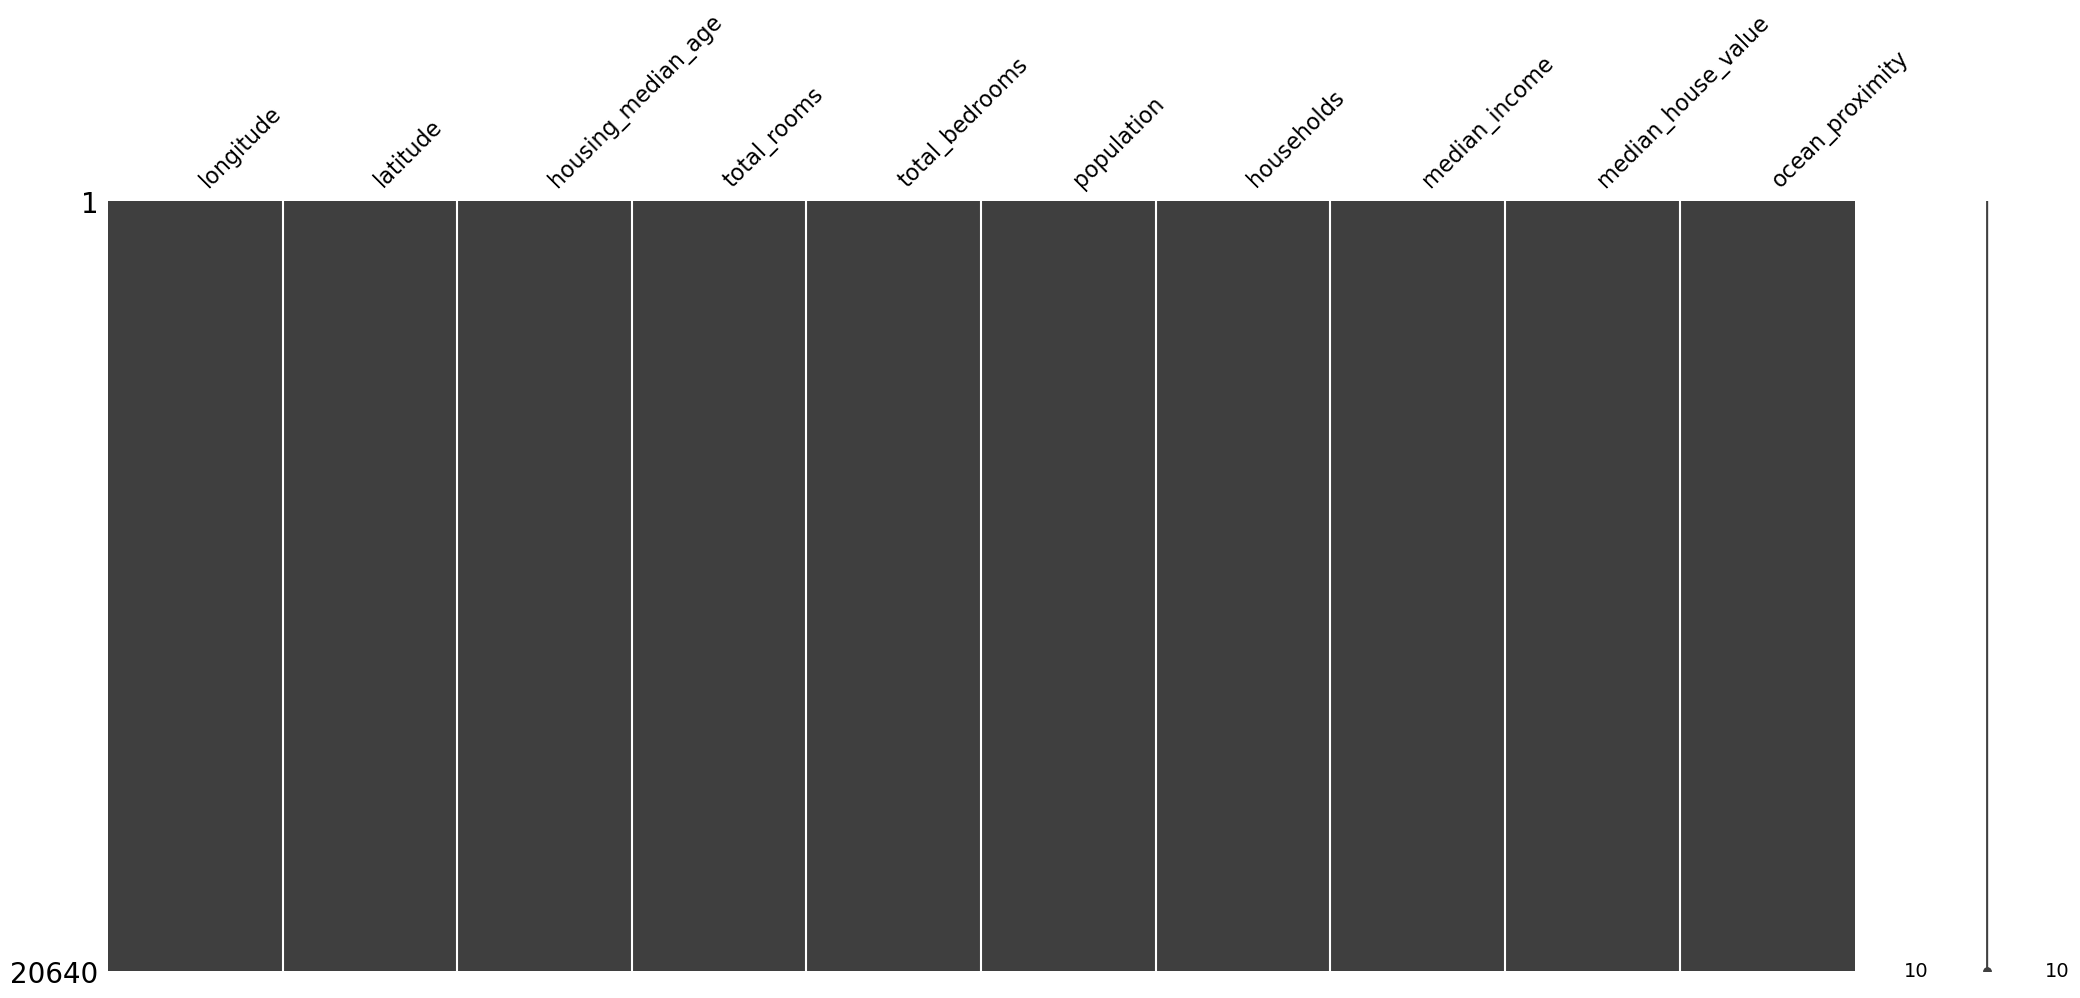

In [18]:
missingno.matrix(df)

In [20]:
numerical_data = df.select_dtypes(include=["float64"])
correlation_matrix = numerical_data.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


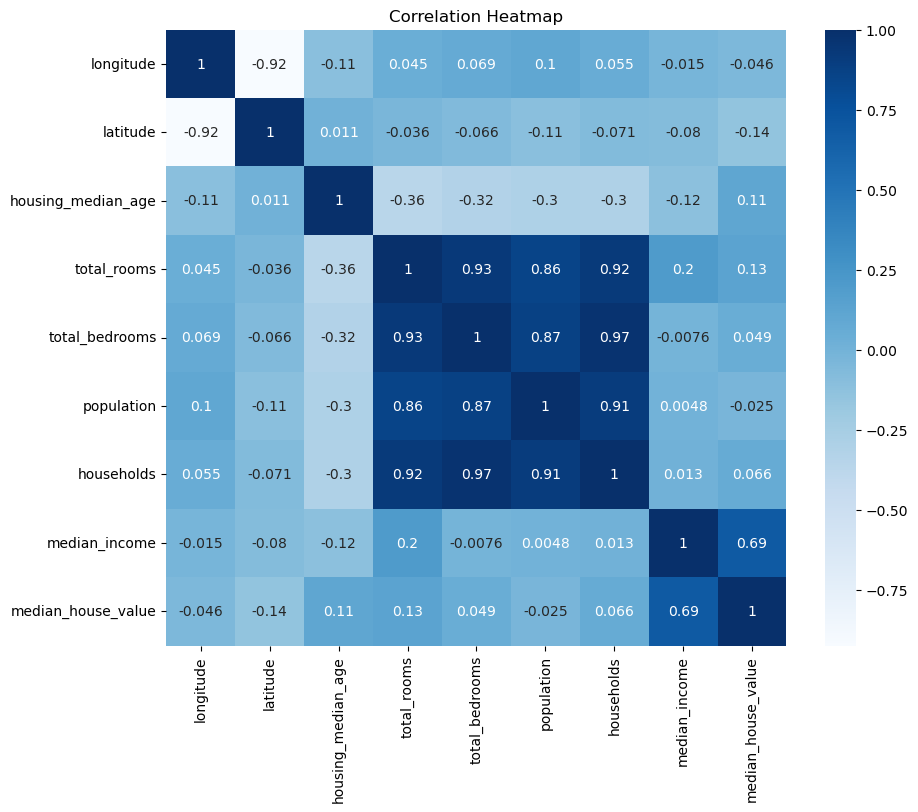

In [21]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [22]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
#  features and target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45,shuffle=True)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16512, 9), (16512,), (4128, 9), (4128,))

In [14]:
num_cols = X_train.select_dtypes(include='number').columns.tolist()
categ_cols = X_train.select_dtypes(exclude='number').columns.tolist()
print('Numerical cols \t', num_cols)
print('Categorical cols \t', categ_cols)

Numerical cols 	 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical cols 	 ['ocean_proximity']


In [19]:
## Numerical pipeline
num_pipeline = Pipeline(steps=[
                        ('selector', DataFrameSelector(num_cols)),
                        ('imputer', SimpleImputer(strategy='median')),
                        ('transform', PowerTransformer(method='yeo-johnson', standardize=True))
                ])


## Catgeorical pipeline
categ_pipeline = Pipeline(steps=[
                ('selector', DataFrameSelector(categ_cols)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder())
               ])


## Combine all
all_pipe = FeatureUnion(transformer_list=[
                ('num', num_pipeline),
                ('categ', categ_pipeline)
            ])


In [20]:
X_train_final = all_pipe.fit_transform(X_train)
X_test_final = all_pipe.transform(X_test)

In [21]:
from sklearn.linear_model import ElasticNet


# Initialize ElasticNet with the desired parameters
elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.5, random_state=42)  # Adjust alpha and l1_ratio as needed

# Train the ElasticNet model
elastic_net.fit(X_train_final, y_train)

# Make predictions
y_pred_train_lin = elastic_net.predict(X_train_final)
y_pred_test_lin = elastic_net.predict(X_test_final)

# Evaluate the model using RMSE
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_pred_train_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_pred_test_lin))

print(f'RMSE of Training Dataset using ElasticNet Model is: {rmse_train_lin:.3f}')
print(f'RMSE of Testing Dataset using ElasticNet Model is: {rmse_test_lin:.3f}')


RMSE of Training Dataset using ElasticNet Model is: 80657.580
RMSE of Testing Dataset using ElasticNet Model is: 79486.694


In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train_final, y_train)
y_pred_train_lin = model.predict(X_train_final)
y_pred_test_lin = model.predict(X_test_final)

# Evaluate the model using RMSE
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_pred_train_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_pred_test_lin))

print(f'RMSE of Training Dataset using DecisionTree Model is: {rmse_train_lin:.3f}')
print(f'RMSE of Testing Dataset using DecisionTree Model is: {rmse_test_lin:.3f}')


RMSE of Training Dataset using DecisionTree Model is: 70299.932
RMSE of Testing Dataset using DecisionTree Model is: 70786.703


In [23]:
steps = list()
steps.append(("Preprocessing" , all_pipe))
steps.append(("Decision Tree" , DecisionTreeRegressor))
pipeline = Pipeline(steps = steps)

In [24]:
import joblib
joblib.dump(pipeline, "Third_Group.pkl")  
joblib.dump(df.columns, "Inputs.pkl")     


['Inputs.pkl']

In [25]:
%%writefile Third_app.py
import joblib
import pandas as pd
import streamlit as st


# Load the trained model and input columns
try:
    Model = joblib.load("Third_Group.pkl")
    Inputs = joblib.load("Inputs.pkl")
except FileNotFoundError:
    st.error("Model or input files not found. Ensure 'Third_Group.pkl' and 'Inputs.pkl' are in the directory.")
    st.stop()

def prediction(data):
    return Model.predict(data)[0]

def Main():
    st.title("California Housing Price Prediction")
    st.write("Provide the following details to predict the median house value:")

    # User input fields
    longitude = st.number_input("Longitude", min_value=-124.35, max_value=-114.31, value=-118.0, step=0.01)
    latitude = st.number_input("Latitude", min_value=32.54, max_value=41.95, value=34.0, step=0.01)
    housing_median_age = st.slider("Housing Median Age", min_value=1, max_value=52, value=20)
    total_rooms = st.number_input("Total Rooms", min_value=1, max_value=40000, value=1000)
    total_bedrooms = st.number_input("Total Bedrooms", min_value=1, max_value=5000, value=200)
    population = st.number_input("Population", min_value=1, max_value=40000, value=1500)
    households = st.number_input("Households", min_value=1, max_value=5000, value=300)
    median_income = st.number_input("Median Income (in $10,000s)", min_value=0.5, max_value=15.0, value=3.0)

   
    ocean_proximity = st.selectbox("Ocean Proximity", ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])

    

    # Create DataFrame with all features
    data = pd.DataFrame([{
        'longitude': longitude,
        'latitude': latitude,
        'housing_median_age': housing_median_age,
        'total_rooms': total_rooms,
        'total_bedrooms': total_bedrooms,
        'population': population,
        'households': households,
        'median_income': median_income,
        'ocean_proximity':  ocean_proximity
    }])

    # Check if DataFrame matches model input
    if not all(col in Inputs for col in data.columns):
        st.error("Mismatch between input columns and model expected columns.")
        return

    if st.button("Predict"):
        try:
            result = prediction(data)
            st.success(f"Predicted Median House Value: ${result:,.2f}")
        except Exception as e:
            st.error(f"Prediction failed: {str(e)}")

if __name__ == "__main__":
    Main()


Overwriting Third_app.py
